In [29]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import pickle
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
purchase_data = pd.read_csv('purchase data.csv')
purchase_data.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
purchase_data.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Load trained models

In [4]:
scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

In [5]:
features = purchase_data[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size']]

In [6]:
df_purchase_std = scaler.transform(features)

In [7]:
df_purchase_pca = pca.transform(df_purchase_std)

In [8]:
purchase_kmeans_pca = kmeans_pca.predict(df_purchase_pca)

In [9]:
df_purchase_predictors = purchase_data.copy()
df_purchase_predictors['Segment'] = purchase_kmeans_pca

In [10]:
df_purchase_predictors.groupby('ID').mean()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,,,,,,,,,,,,,,
200000001,333.207921,0.089109,0.267327,0.178218,0.267327,0.089109,1.395149,1.779208,2.008119,2.151188,...,0.148515,0.049505,0.0,0.0,47.0,1.0,110866.0,1.0,0.0,0.0
200000002,350.931034,0.126437,0.482759,0.229885,0.482759,0.126437,1.393678,1.788506,2.007011,2.156437,...,0.160920,0.034483,1.0,1.0,52.0,2.0,159052.0,2.0,1.0,3.0
200000003,358.536082,0.103093,0.268041,0.185567,0.268041,0.103093,1.398763,1.758144,2.005670,2.165464,...,0.123711,0.020619,0.0,0.0,28.0,0.0,113212.0,1.0,0.0,0.0
200000004,369.941176,0.129412,0.611765,0.152941,0.552941,0.117647,1.401059,1.787176,2.011765,2.155882,...,0.141176,0.035294,0.0,0.0,37.0,1.0,119602.0,0.0,0.0,1.0
200000005,362.558559,0.117117,0.585586,0.189189,0.585586,0.117117,1.392342,1.791622,2.005856,2.162883,...,0.117117,0.018018,0.0,0.0,49.0,1.0,121466.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200000496,357.125000,0.166667,0.441667,0.408333,0.441667,0.166667,1.384083,1.768000,2.009583,2.153333,...,0.133333,0.033333,1.0,1.0,26.0,1.0,71021.0,0.0,0.0,1.0
200000497,349.383333,0.358333,0.950000,2.066667,0.950000,0.358333,1.388000,1.777083,2.005000,2.160167,...,0.141667,0.041667,0.0,0.0,60.0,2.0,89374.0,0.0,0.0,1.0
200000498,346.206107,0.297710,0.641221,0.954198,0.641221,0.297710,1.385191,1.796489,2.006565,2.158550,...,0.091603,0.030534,1.0,1.0,29.0,1.0,114784.0,1.0,0.0,2.0


### Descriptive analysis of customer

In [14]:
#Number of visits to the store per customer
df_cust_vis = purchase_data[['ID','Incidence']].groupby('ID').count()
df_cust_vis.rename(columns= {'Incidence':'Num_visits'},inplace = True)
df_cust_vis

,Num_visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [15]:
#Number of visits to the store per customer
df_cust_pur = purchase_data[['ID','Incidence']].groupby('ID').sum()
df_cust_pur.rename(columns= {'Incidence':'Num_Purchase'},inplace = True)
df_cust_pur

,Num_Purchase
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13
...,...
200000496,20
200000497,43
200000498,39


In [19]:
#Number of of purchase rate per customer
pur_rate = df_cust_pur['Num_Purchase']/df_cust_vis['Num_visits']
df_cust_pur['Purchase rate'] = pur_rate
#pur_rate.rename(columns= {'Incidence':'Purchase rate'},inplace = True)
df_cust_pur

,Num_Purchase,Purchase rate
ID,,
200000001,9,0.089109
200000002,11,0.126437
200000003,10,0.103093
200000004,11,0.129412
200000005,13,0.117117
...,...,...
200000496,20,0.166667
200000497,43,0.358333
200000498,39,0.297710


In [23]:
cust_segment = df_purchase_predictors[['ID','Segment']].groupby('ID').mean()
cust_segment.head()

,Segment
ID,
200000001,0.0
200000002,3.0
200000003,0.0
200000004,1.0
200000005,0.0


In [24]:
cust_analytics = df_cust_vis.join([df_cust_pur,cust_segment])

In [25]:
cust_analytics

,Num_visits,Num_Purchase,Purchase rate,Segment
ID,,,,
200000001,101,9,0.089109,0.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,0.0
200000004,85,11,0.129412,1.0
200000005,111,13,0.117117,0.0
...,...,...,...,...
200000496,120,20,0.166667,1.0
200000497,120,43,0.358333,1.0
200000498,131,39,0.297710,2.0


### Segment analytics

In [31]:
seg_pur_rate = cust_analytics[['Segment','Num_Purchase']].groupby('Segment').count()/cust_analytics.shape[0]
seg_pur_rate.rename(columns = {'Num_Purchase':'Segment_purchase_rate'},inplace = True)

,Segment_purchase_rate
Segment,
0.0,0.290
1.0,0.362
2.0,0.152
3.0,0.196


In [36]:
seg_rate_labels = seg_pur_rate.rename(index = {0.0: "Career focused",
                                               1.0: "Fewer opportunities",
                                               2.0: "Standard",
                                               3.0: "Well-off"})
seg_rate_labels

,Segment_purchase_rate
Segment,
Career focused,0.290
Fewer opportunities,0.362
Standard,0.152
Well-off,0.196


([<matplotlib.patches.Wedge at 0x1732ce678f0>,
 [Text(0.6741977004263888, 0.8691705590617813, 'Career focused'),
  Text(-1.081789763864488, 0.19932613174898978, 'Fewer opportunities'),
  Text(-0.15156901291585867, -1.0895076109526323, 'Standard'),
  Text(0.8979733942136754, -0.6353296650435674, 'Well-off')],
 [Text(0.36774420023257565, 0.474093032215517, '29.0%'),
  Text(-0.5900671439260843, 0.10872334459035805, '36.2%'),
  Text(-0.08267400704501382, -0.5942768787014358, '15.2%'),
  Text(0.48980366957109556, -0.3465434536601276, '19.6%')])

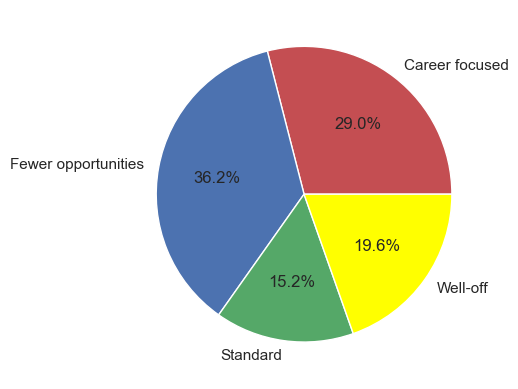

In [53]:
plt.pie(x = seg_rate_labels['Segment_purchase_rate'],
        colors = ['r','b','g','yellow'],
       labels = seg_rate_labels.index,
       autopct = '%1.1f%%')
        

In [54]:
seg_mean = cust_analytics.groupby('Segment').mean()
seg_mean

,Num_visits,Num_Purchase,Purchase rate
Segment,,,
0.0,120.489655,34.965517,0.258081
1.0,114.303867,22.823204,0.201760
2.0,118.828947,27.171053,0.228956
3.0,117.367347,34.408163,0.282601


In [55]:
seg_std = cust_analytics.groupby('Segment').std()
seg_std

,Num_visits,Num_Purchase,Purchase rate
Segment,,,
0.0,39.398448,47.564198,0.181261
1.0,17.762052,13.851663,0.120124
2.0,19.834239,19.495222,0.146761
3.0,20.840775,25.997160,0.172682


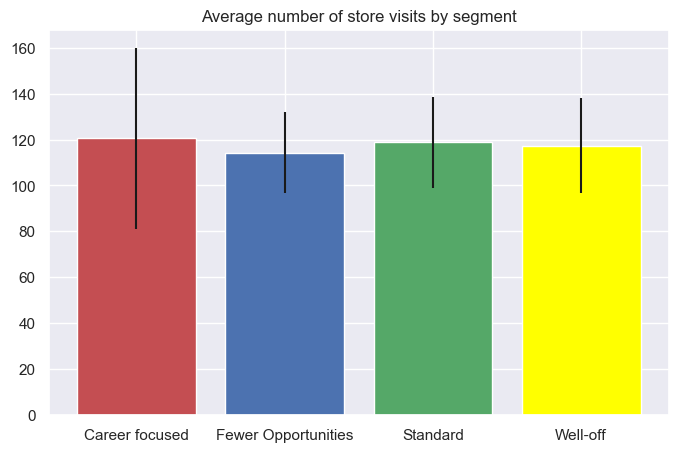

In [62]:
plt.figure(figsize = (8,5))
plt.bar(x = ['Career focused','Fewer Opportunities','Standard','Well-off'],
        height = seg_mean['Num_visits'],
        yerr = seg_std['Num_visits'],
        color = ['r','b','g','yellow'])
plt.title('Average number of store visits by segment')
plt.show()

The standard deviation in the diagram above describes the similarity between the customers in each segment.
A larger standard deviation shows that the customers' shopping behaviors are different within that segment. That is, some customers might visit often while others hardly visit the store. This is seen in the career-focused segment. However, the low standard deviation in the other segments show that they have a similar habit of visiting the store.


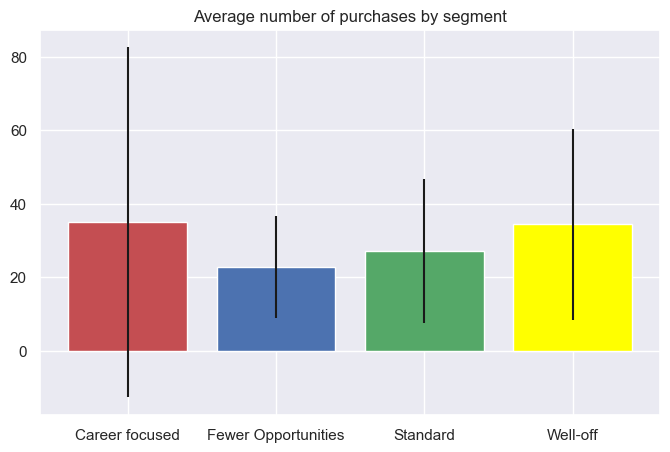

In [64]:
plt.figure(figsize = (8,5))
plt.bar(x = ['Career focused','Fewer Opportunities','Standard','Well-off'],
        height = seg_mean['Num_Purchase'],
        yerr = seg_std['Num_Purchase'],
        color = ['r','b','g','yellow'])
plt.title('Average number of purchases by segment')
plt.show()

This plot also shows that the career-focused segment are also the least alike when it comes to their purchase habits. 
However, they buy products more often than the standard and fewer opportunities segments.
Furthermore, the well-off segment makes purchases as much as the career-focused segment, although the customers in this segment have more in common when it comes to their purchase habits.

### Brand choice

In [93]:
df_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [94]:
df_brand = pd.get_dummies(df_incidence['Brand'],prefix ="Brand",prefix_sep='_',dtype = float)
df_brand.tail()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
58621,0.0,1.0,0.0,0.0,0.0
58648,1.0,0.0,0.0,0.0,0.0
58674,0.0,1.0,0.0,0.0,0.0
58687,0.0,1.0,0.0,0.0,0.0
58691,0.0,1.0,0.0,0.0,0.0


In [95]:
df_brand['ID'],df_brand['Segment'] = df_incidence['ID'],df_incidence['Segment']

In [96]:
df_brand.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,ID,Segment
6,0.0,1.0,0.0,0.0,0.0,200000001,0
11,0.0,0.0,0.0,0.0,1.0,200000001,0
19,1.0,0.0,0.0,0.0,0.0,200000001,0
24,0.0,0.0,0.0,1.0,0.0,200000001,0
29,0.0,1.0,0.0,0.0,0.0,200000001,0


In [97]:
brand_ID= df_brand.groupby('ID').mean()
brand_segment = brand_ID.groupby('Segment').mean()
brand_segment

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.079019,0.329006,0.029233,0.093493,0.469248
1.0,0.167302,0.597683,0.061925,0.069068,0.104022
2.0,0.232219,0.373984,0.119907,0.077677,0.196212
3.0,0.047030,0.131953,0.029682,0.594854,0.196479


In [98]:
labels = ["Career focused","Fewer opportunities","Standard","Well-off"]

Text(0.5, 1.0, 'Average brand choice by segment')

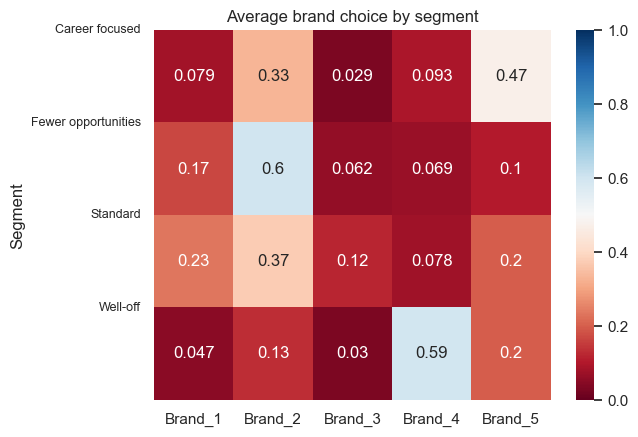

In [99]:
sns.heatmap(brand_segment,cmap = 'RdBu',annot = True,
           vmin = 0,
           vmax = 1)
plt.yticks([0,1,2,3],labels,rotation = 360,fontsize = 9)
plt.title('Average brand choice by segment')

From the heatmap, we can tell that the fewer opportunities and standard segments like Brand_2, followed by brand 1. 
The price of the chocolates may have something to do with it.
Next, the career-focused group like the most expensive chocolate which is brand 5 the best, followed by brand 2. 
Considering the past analysis, this further shows the difference in the purchase habits of individuals in this segment. This shows that while some crave a sense of luxury, others might just like good chocolate which might be the case of brand 2 since so many people like it.
Finally, 59% of the well-off segment seem to enjoy brand_4 which is considerably more expensive than brand 2, followed by brand 5 which is the most expensive.
We might even say the well off segment also love a sense of luxury. 
This might be an opportunity to increase the price of the more expensive brands.
